In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('./data/first_batch.csv', index_col = 0)
df2 = pd.read_csv('./data/second_batch.csv', index_col = 0)
df = pd.concat([df1,df2]).reindex()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 38
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         54 non-null     int64  
 1   Gender      54 non-null     object 
 2   Location    54 non-null     object 
 3   Education   54 non-null     object 
 4   Employment  54 non-null     object 
 5   Eng_ent     54 non-null     float64
 6   Math_ent    54 non-null     object 
 7   Commitment  54 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.8+ KB


In [18]:
df_loc = df[['Location', 'Gender']].copy()
df_loc_grp = df_loc.groupby('Location').count().reset_index()

df_loc_grp  = df_loc_grp.rename(columns = {"Gender": "count"}).sort_values(by = 'count', ascending = False)
df_loc_grp

,Location,count
11,Yangon,23
4,Mandalay,7
5,Mon,5
6,Sagaing,4
7,Shan,3
3,Magway,3
1,Kachin,2
2,Kayin,2
9,Thailand (Mae Sot),2
0,Bago,1


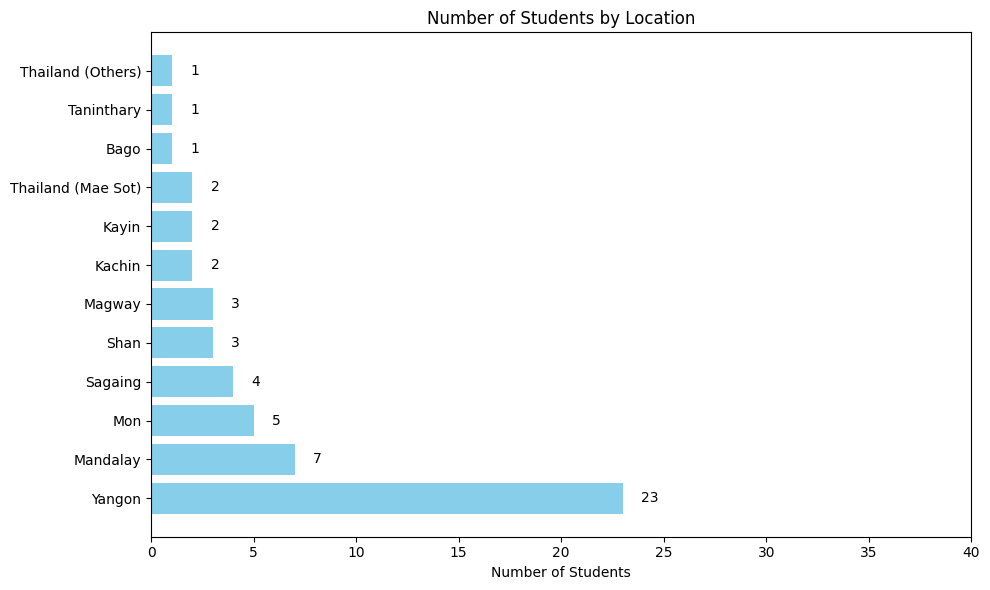

In [33]:
plt.figure(figsize=(10, 6))
bars = plt.barh(df_loc_grp['Location'], df_loc_grp['count'], color='skyblue')
labels = list(df_loc_grp['count'])

for idx, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.9,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Position text in the middle of the bar height
        f'{labels[idx]}', 
        va='center'  # Align text vertically centered
    )


plt.title('Number of Students by Location')
plt.xlabel('Number of Students')
plt.ylabel('')
plt.xlim(0, 40)
plt.tight_layout()
plt.show()

In [35]:
location_counts = pd.read_csv('./data/data_accept_region.csv', index_col = 0)
location_counts['Total Accepted'] = location_counts['Total Accepted'].astype('int')
location_counts  = location_counts.sort_values(by = 'Acceptance Rate (%)', ascending = False)
location_counts

,Location,Total Applicants,Total Accepted,Acceptance Rate (%),labels
15,Mon,8,5,62.500000,5/8
14,Magway,5,3,60.000000,3/5
13,Yangon,54,23,42.592593,23/54
11,Sagaing,10,4,40.000000,4/10
12,Thailand (Mae Sot),5,2,40.000000,2/5
10,Kachin,5,2,40.000000,2/5
9,Shan,8,3,37.500000,3/8
8,Mandalay,22,7,31.818182,7/22
7,Kayin,7,2,28.571429,2/7
5,Taninthary,4,1,25.000000,1/4


In [36]:
mean_acceptance_rate = location_counts['Acceptance Rate (%)'].mean()
std_acceptance_rate = location_counts['Acceptance Rate (%)'].std()
underserved_threshold = mean_acceptance_rate - std_acceptance_rate
high_threshold = mean_acceptance_rate + std_acceptance_rate

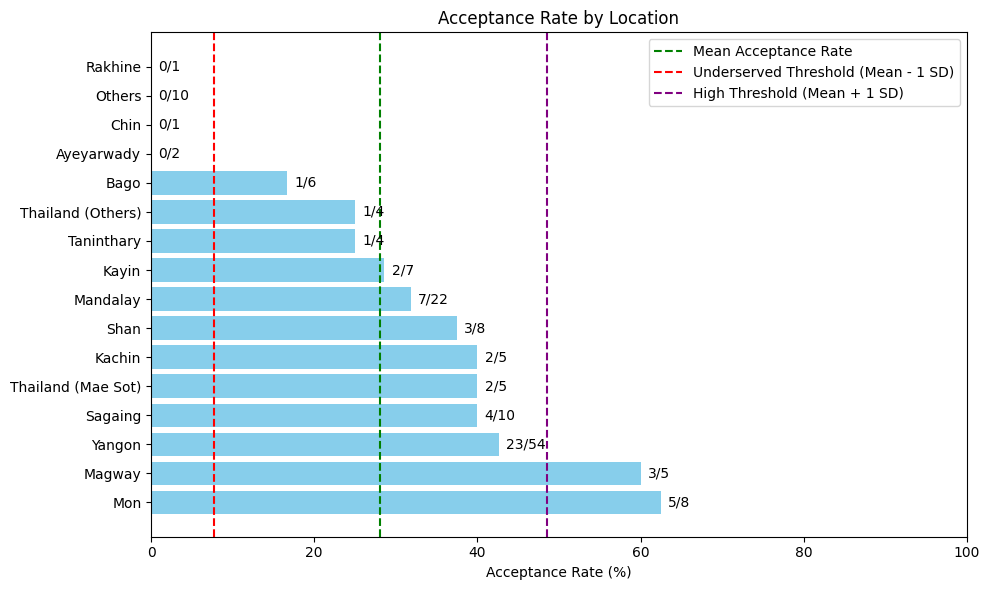

In [38]:
plt.figure(figsize=(10, 6))
bars = plt.barh(location_counts['Location'], location_counts['Acceptance Rate (%)'], color='skyblue')
labels = list(location_counts['labels'])

for idx, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.9,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Position text in the middle of the bar height
        f'{labels[idx]}', 
        va='center'  # Align text vertically centered
    )


plt.axvline(x=mean_acceptance_rate, color='green', linestyle='--', label='Mean Acceptance Rate')
plt.axvline(x=underserved_threshold, color='red', linestyle='--', label='Underserved Threshold (Mean - 1 SD)')
plt.axvline(x=high_threshold, color='purple', linestyle='--', label='High Threshold (Mean + 1 SD)')
plt.title('Acceptance Rate by Location')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('')
plt.xlim(0, 100)
plt.legend()
plt.tight_layout()